# Importing Libraries 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data Set 


In [2]:
df_drug = pd.read_csv(r"D:\Excel files\Drug Classification\drug200.csv")

In [3]:
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
## Data type and checking null valsin dataset.

In [5]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


From the results above, **there are no missing/null value** in this dataset

## Categorical Variables 

In [6]:
df_drug.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

It can be seen that from results above, DrugY has more amount than other types of drugs

In [7]:
df_drug.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

The distribution of patient gender is balanced.

In [8]:
df_drug.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

The distribution of blood pressure level is balanced.

In [9]:
df_drug.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

The distribution of cholesterol level is balanced.

## Numerical Variables 


In [10]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [11]:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [12]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


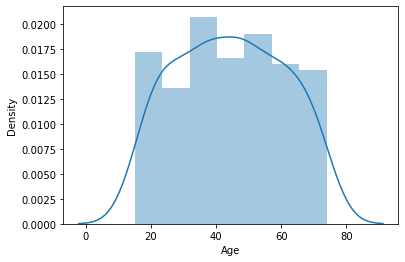

In [13]:
sns.distplot(df_drug['Age']);

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


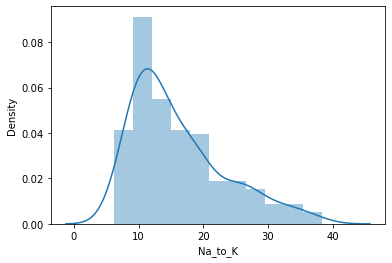

In [14]:
sns.distplot(df_drug['Na_to_K']);

The distribution of **'Age'** column is **symetric**, since the skewness value  between -0.5 and 0.5 <br>
The distribution of **'Na_to_K'** column is **moderately skewed**, since the skewness value is ***between 0.5 and 1***. It can also be seen from the histogram for 'Na_to_K' column

# EDA 


## Drug Type Distribution 

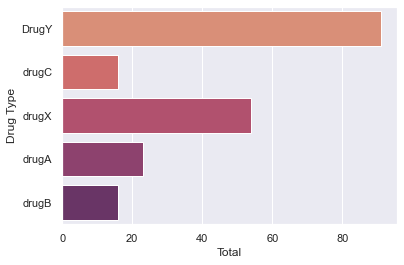

In [15]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df_drug, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

## Gender Distribution 

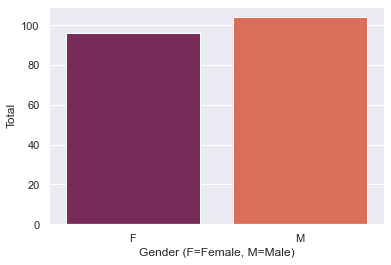

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df_drug, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

## Blood Pressure Distribution 

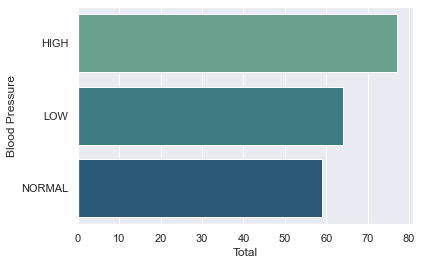

In [17]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df_drug, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

## Cholesterol Distribution 

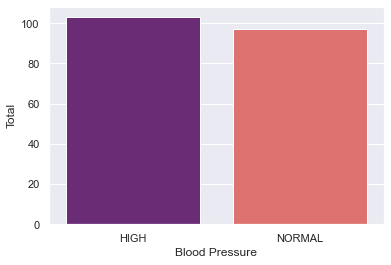

In [18]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df_drug, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

## Gender Distribution based on Drug Type

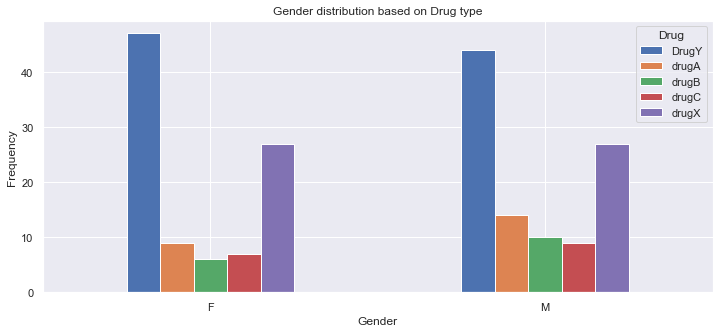

In [19]:
pd.crosstab(df_drug.Sex,df_drug.Drug).plot(kind="bar",figsize=(12,5))
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## Blood Pressure Distribution based on Cholesetrol 

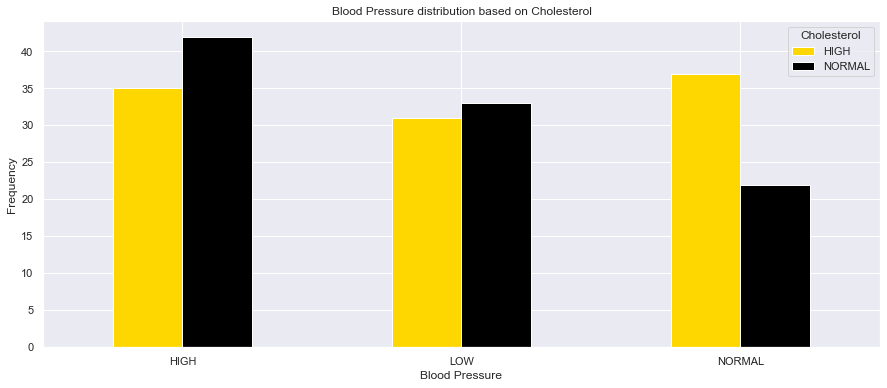

In [20]:
pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['gold','black'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## Sodium to Potassium Distribution based on Gender and Age

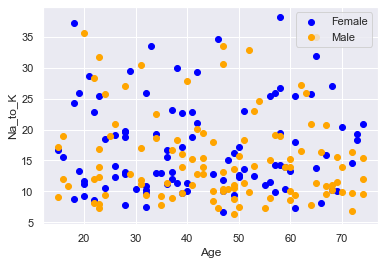

In [21]:
plt.scatter(x=df_drug.Age[df_drug.Sex=='F'], y=df_drug.Na_to_K[(df_drug.Sex=='F')], c="Blue")
plt.scatter(x=df_drug.Age[df_drug.Sex=='M'], y=df_drug.Na_to_K[(df_drug.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

# Dataset Preparation 


## Data Binning 

###  Age 
The age will be divided into **7 age categories**:
*  Below 20 y.o.
*  20 - 29 y.o.
*  30 - 39 y.o.
*  40 - 49 y.o.
*  50 - 59 y.o.
*  60 - 69 y.o.
*  Above 70.

In [22]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df_drug['Age_binned'] = pd.cut(df_drug['Age'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['Age'], axis = 1)

###  Na_to_K 
The chemical ratio will be divided into **4 categories**:
*  Below 10.
*  10 - 20.
*  20 - 30.
*  Above 30.

In [23]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df_drug['Na_to_K_binned'] = pd.cut(df_drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df_drug.drop(['Na_to_K'], axis = 1)

## Splitting the dataset 
The dataset will be split into **70% training and 20% testing**.

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
X = df_drug.drop(["Drug"], axis=1)
y = df_drug["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Feature Engineering 


In [26]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [27]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
134,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
66,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
26,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
113,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
168,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [28]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


## SMOTE Technique 

Since the number of 'DrugY' is more than other types of drugs, **oversampling is carried out to avoid overfitting**.

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

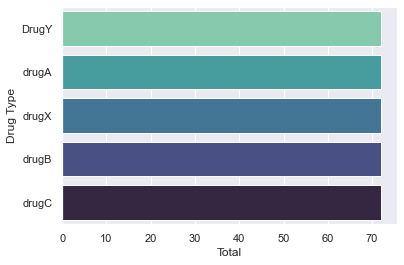

In [31]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df_drug, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

As can be seen, the distrubtion of drug type are now balanced.

In [32]:
import warnings
warnings.filterwarnings('ignore')

#  Models 

## 1.Base Models

## 1 Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(random_state=10)
LRclassifier.fit(X_train, y_train)

y_pred_test = LRclassifier.predict(X_test)
y_pred_train = LRclassifier.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
LRAcc_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of Logistic Regression model is: {:.2f}%'.format(LRAcc_test*100))
LRAcc_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of Logistic Regression is: {:.2f}%'.format(LRAcc_train*100))

              precision    recall  f1-score   support

       DrugY       0.87      0.68      0.76        19
       drugA       0.60      1.00      0.75         3
       drugB       1.00      1.00      1.00         1
       drugC       0.60      1.00      0.75         3
       drugX       0.86      0.86      0.86        14

    accuracy                           0.80        40
   macro avg       0.78      0.91      0.82        40
weighted avg       0.83      0.80      0.80        40

[[13  2  0  2  2]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 2  0  0  0 12]]
Test Accuracy of Logistic Regression model is: 80.00%
Training Accuracy of Logistic Regression is: 90.56%


## 2 K Neighbours

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier()
KNclassifier.fit(X_train, y_train)

y_pred_test = KNclassifier.predict(X_test)
y_pred_train = KNclassifier.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
KNAcc_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of KNN model is: {:.2f}%'.format(KNAcc_test*100))
KNAcc_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of KNN model is: {:.2f}%'.format(KNAcc_train*100))

              precision    recall  f1-score   support

       DrugY       0.62      0.53      0.57        19
       drugA       0.50      0.67      0.57         3
       drugB       0.00      0.00      0.00         1
       drugC       0.50      1.00      0.67         3
       drugX       0.75      0.64      0.69        14

    accuracy                           0.60        40
   macro avg       0.47      0.57      0.50        40
weighted avg       0.63      0.60      0.61        40

[[10  2  1  3  3]
 [ 1  2  0  0  0]
 [ 1  0  0  0  0]
 [ 0  0  0  3  0]
 [ 4  0  1  0  9]]
Test Accuracy of KNN model is: 60.00%
Training Accuracy of KNN model is: 72.78%


## 3 Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC
SVCclassifier = SVC(random_state=10)
SVCclassifier.fit(X_train, y_train)

y_pred_test = SVCclassifier.predict(X_test)
y_pred_train = SVCclassifier.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
SVCAcc_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of SVM model is: {:.2f}%'.format(SVCAcc_test*100))
SVCAcc_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of SVM model is: {:.2f}%'.format(SVCAcc_train*100))

              precision    recall  f1-score   support

       DrugY       0.47      1.00      0.64        19
       drugA       0.00      0.00      0.00         3
       drugB       0.00      0.00      0.00         1
       drugC       0.00      0.00      0.00         3
       drugX       0.00      0.00      0.00        14

    accuracy                           0.48        40
   macro avg       0.10      0.20      0.13        40
weighted avg       0.23      0.47      0.31        40

[[19  0  0  0  0]
 [ 3  0  0  0  0]
 [ 1  0  0  0  0]
 [ 3  0  0  0  0]
 [14  0  0  0  0]]
Test Accuracy of SVM model is: 47.50%
Training Accuracy of SVM model is: 43.89%


## 4 Naive Bayes
### 4.1 Categorical NB

In [36]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred_test = NBclassifier1.predict(X_test)
y_pred_train = NBclassifier1.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
NBAcc1_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of Cat NB model is: {:.2f}%'.format(NBAcc1_test*100))
NBAcc1_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of Cat NB model is: {:.2f}%'.format(NBAcc1_train*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.63      0.77        19
       drugA       0.60      1.00      0.75         3
       drugB       1.00      1.00      1.00         1
       drugC       0.60      1.00      0.75         3
       drugX       0.82      1.00      0.90        14

    accuracy                           0.82        40
   macro avg       0.80      0.93      0.84        40
weighted avg       0.88      0.82      0.82        40

[[12  2  0  2  3]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]
Test Accuracy of Cat NB model is: 82.50%
Training Accuracy of Cat NB model is: 90.83%


### 4.2 Gaussian NB

In [37]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred_test = NBclassifier2.predict(X_test)
y_pred_train = NBclassifier2.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
NBAcc2_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of Guassian NB model is: {:.2f}%'.format(NBAcc2_test*100))
NBAcc2_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of Guassian NB model is: {:.2f}%'.format(NBAcc2_train*100))

              precision    recall  f1-score   support

       DrugY       0.59      0.89      0.71        19
       drugA       0.50      0.67      0.57         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      0.33      0.50         3
       drugX       1.00      0.36      0.53        14

    accuracy                           0.65        40
   macro avg       0.82      0.65      0.66        40
weighted avg       0.77      0.65      0.63        40

[[17  2  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  1  0  0]
 [ 2  0  0  1  0]
 [ 9  0  0  0  5]]
Test Accuracy of Guassian NB model is: 65.00%
Training Accuracy of Guassian NB model is: 78.89%


## 5 Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(random_state=10)
DTclassifier.fit(X_train, y_train)

y_pred_test = DTclassifier.predict(X_test)
y_pred_train = DTclassifier.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
DTAcc_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of Decision Tree model is: {:.2f}%'.format(DTAcc_test*100))
DTAcc_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of Decision Tree model is: {:.2f}%'.format(DTAcc_train*100))

              precision    recall  f1-score   support

       DrugY       0.67      0.63      0.65        19
       drugA       0.50      0.67      0.57         3
       drugB       0.00      0.00      0.00         1
       drugC       0.60      1.00      0.75         3
       drugX       0.77      0.71      0.74        14

    accuracy                           0.68        40
   macro avg       0.51      0.60      0.54        40
weighted avg       0.67      0.68      0.67        40

[[12  2  0  2  3]
 [ 1  2  0  0  0]
 [ 1  0  0  0  0]
 [ 0  0  0  3  0]
 [ 4  0  0  0 10]]
Test Accuracy of Decision Tree model is: 67.50%
Training Accuracy of Decision Tree model is: 96.39%


## 6 Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(random_state=10)
RFclassifier.fit(X_train, y_train)

y_pred_test = RFclassifier.predict(X_test)
y_pred_train = RFclassifier.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
RFAcc_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of Random Forest model is: {:.2f}%'.format(RFAcc_test*100))
RFAcc_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of Random Forest model is: {:.2f}%'.format(RFAcc_train*100))

              precision    recall  f1-score   support

       DrugY       0.86      0.63      0.73        19
       drugA       0.60      1.00      0.75         3
       drugB       1.00      1.00      1.00         1
       drugC       0.60      1.00      0.75         3
       drugX       0.80      0.86      0.83        14

    accuracy                           0.78        40
   macro avg       0.77      0.90      0.81        40
weighted avg       0.80      0.78      0.77        40

[[12  2  0  2  3]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 2  0  0  0 12]]
Test Accuracy of Random Forest model is: 77.50%
Training Accuracy of Random Forest model is: 96.39%


## 7.Bagging Classifier

In [40]:
from sklearn.ensemble import BaggingClassifier

Bagclassifier = BaggingClassifier(random_state=10)
Bagclassifier.fit(X_train, y_train)

y_pred_test = Bagclassifier.predict(X_test)
y_pred_train = Bagclassifier.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
BagAcc_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of Bagging Classsifier model is: {:.2f}%'.format(BagAcc_test*100))
BagAcc_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of Bagging Classifier model is: {:.2f}%'.format(BagAcc_train*100))

              precision    recall  f1-score   support

       DrugY       0.75      0.63      0.69        19
       drugA       0.50      0.67      0.57         3
       drugB       1.00      1.00      1.00         1
       drugC       0.60      1.00      0.75         3
       drugX       0.79      0.79      0.79        14

    accuracy                           0.73        40
   macro avg       0.73      0.82      0.76        40
weighted avg       0.74      0.72      0.72        40

[[12  2  0  2  3]
 [ 1  2  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 3  0  0  0 11]]
Test Accuracy of Bagging Classsifier model is: 72.50%
Training Accuracy of Bagging Classifier model is: 96.11%


## 8.Ada Boost

In [41]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost = AdaBoostClassifier(base_estimator = DTclassifier,random_state=10)
AdaBoost.fit(X_train, y_train)

y_pred_test = AdaBoost.predict(X_test)
y_pred_train = AdaBoost.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
AdaBoost_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of Ada Boost Classsifier model is: {:.2f}%'.format(AdaBoost_test*100))
AdaBoost_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of Ada Boost Classifier model is: {:.2f}%'.format(AdaBoost_train*100))

              precision    recall  f1-score   support

       DrugY       0.69      0.58      0.63        19
       drugA       0.50      0.67      0.57         3
       drugB       0.00      0.00      0.00         1
       drugC       0.60      1.00      0.75         3
       drugX       0.79      0.79      0.79        14

    accuracy                           0.68        40
   macro avg       0.51      0.61      0.55        40
weighted avg       0.68      0.68      0.67        40

[[11  2  1  2  3]
 [ 1  2  0  0  0]
 [ 1  0  0  0  0]
 [ 0  0  0  3  0]
 [ 3  0  0  0 11]]
Test Accuracy of Ada Boost Classsifier model is: 67.50%
Training Accuracy of Ada Boost Classifier model is: 96.39%


## 9.CatBoost

In [42]:
from catboost import CatBoostClassifier

CatBoost = CatBoostClassifier()
CatBoost.fit(X_train, y_train)

y_pred_test = CatBoost.predict(X_test)
y_pred_train = CatBoost.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
CatBoost_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of Cat Boost Classsifier model is: {:.2f}%'.format(CatBoost_test*100))
CatBoost_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of Cat Boost Classifier model is: {:.2f}%'.format(CatBoost_train*100))

Learning rate set to 0.075109
0:	learn: 1.5126127	total: 154ms	remaining: 2m 33s
1:	learn: 1.4192853	total: 156ms	remaining: 1m 17s
2:	learn: 1.3411125	total: 158ms	remaining: 52.6s
3:	learn: 1.2715266	total: 161ms	remaining: 40s
4:	learn: 1.2126769	total: 163ms	remaining: 32.4s
5:	learn: 1.1650478	total: 165ms	remaining: 27.4s
6:	learn: 1.1187842	total: 168ms	remaining: 23.8s
7:	learn: 1.0763260	total: 170ms	remaining: 21.1s
8:	learn: 1.0396210	total: 173ms	remaining: 19s
9:	learn: 1.0090587	total: 175ms	remaining: 17.3s
10:	learn: 0.9710447	total: 177ms	remaining: 15.9s
11:	learn: 0.9424712	total: 180ms	remaining: 14.8s
12:	learn: 0.9130750	total: 182ms	remaining: 13.8s
13:	learn: 0.8832386	total: 184ms	remaining: 13s
14:	learn: 0.8629145	total: 187ms	remaining: 12.3s
15:	learn: 0.8347133	total: 189ms	remaining: 11.6s
16:	learn: 0.8144275	total: 191ms	remaining: 11s
17:	learn: 0.7916414	total: 193ms	remaining: 10.5s
18:	learn: 0.7730297	total: 195ms	remaining: 10.1s
19:	learn: 0.7530

171:	learn: 0.1967580	total: 531ms	remaining: 2.56s
172:	learn: 0.1959520	total: 533ms	remaining: 2.55s
173:	learn: 0.1953430	total: 535ms	remaining: 2.54s
174:	learn: 0.1946042	total: 538ms	remaining: 2.54s
175:	learn: 0.1939365	total: 540ms	remaining: 2.53s
176:	learn: 0.1933719	total: 542ms	remaining: 2.52s
177:	learn: 0.1927119	total: 545ms	remaining: 2.51s
178:	learn: 0.1923375	total: 547ms	remaining: 2.51s
179:	learn: 0.1917212	total: 549ms	remaining: 2.5s
180:	learn: 0.1911044	total: 551ms	remaining: 2.5s
181:	learn: 0.1903291	total: 554ms	remaining: 2.49s
182:	learn: 0.1896814	total: 556ms	remaining: 2.48s
183:	learn: 0.1891743	total: 558ms	remaining: 2.47s
184:	learn: 0.1885805	total: 560ms	remaining: 2.47s
185:	learn: 0.1876972	total: 562ms	remaining: 2.46s
186:	learn: 0.1870801	total: 565ms	remaining: 2.46s
187:	learn: 0.1862470	total: 567ms	remaining: 2.45s
188:	learn: 0.1854451	total: 569ms	remaining: 2.44s
189:	learn: 0.1847291	total: 571ms	remaining: 2.44s
190:	learn: 0.

407:	learn: 0.1191786	total: 1.06s	remaining: 1.53s
408:	learn: 0.1190474	total: 1.06s	remaining: 1.53s
409:	learn: 0.1189256	total: 1.06s	remaining: 1.53s
410:	learn: 0.1188038	total: 1.06s	remaining: 1.52s
411:	learn: 0.1186684	total: 1.06s	remaining: 1.52s
412:	learn: 0.1185053	total: 1.07s	remaining: 1.52s
413:	learn: 0.1184212	total: 1.07s	remaining: 1.51s
414:	learn: 0.1182847	total: 1.07s	remaining: 1.51s
415:	learn: 0.1182121	total: 1.07s	remaining: 1.51s
416:	learn: 0.1180815	total: 1.08s	remaining: 1.5s
417:	learn: 0.1178481	total: 1.08s	remaining: 1.5s
418:	learn: 0.1176972	total: 1.08s	remaining: 1.5s
419:	learn: 0.1176018	total: 1.08s	remaining: 1.5s
420:	learn: 0.1175106	total: 1.08s	remaining: 1.49s
421:	learn: 0.1173298	total: 1.09s	remaining: 1.49s
422:	learn: 0.1172037	total: 1.09s	remaining: 1.49s
423:	learn: 0.1170256	total: 1.09s	remaining: 1.48s
424:	learn: 0.1169313	total: 1.09s	remaining: 1.48s
425:	learn: 0.1168390	total: 1.1s	remaining: 1.48s
426:	learn: 0.116

568:	learn: 0.1031464	total: 1.42s	remaining: 1.07s
569:	learn: 0.1030647	total: 1.42s	remaining: 1.07s
570:	learn: 0.1030241	total: 1.42s	remaining: 1.07s
571:	learn: 0.1029612	total: 1.42s	remaining: 1.06s
572:	learn: 0.1029068	total: 1.42s	remaining: 1.06s
573:	learn: 0.1028329	total: 1.43s	remaining: 1.06s
574:	learn: 0.1027994	total: 1.43s	remaining: 1.06s
575:	learn: 0.1027447	total: 1.43s	remaining: 1.05s
576:	learn: 0.1026438	total: 1.43s	remaining: 1.05s
577:	learn: 0.1025601	total: 1.44s	remaining: 1.05s
578:	learn: 0.1025020	total: 1.44s	remaining: 1.04s
579:	learn: 0.1023787	total: 1.44s	remaining: 1.04s
580:	learn: 0.1023201	total: 1.44s	remaining: 1.04s
581:	learn: 0.1022536	total: 1.44s	remaining: 1.04s
582:	learn: 0.1021873	total: 1.45s	remaining: 1.03s
583:	learn: 0.1021417	total: 1.45s	remaining: 1.03s
584:	learn: 0.1020731	total: 1.45s	remaining: 1.03s
585:	learn: 0.1020058	total: 1.45s	remaining: 1.03s
586:	learn: 0.1019422	total: 1.46s	remaining: 1.02s
587:	learn: 

803:	learn: 0.0916463	total: 1.94s	remaining: 473ms
804:	learn: 0.0916209	total: 1.94s	remaining: 471ms
805:	learn: 0.0915861	total: 1.95s	remaining: 469ms
806:	learn: 0.0915592	total: 1.95s	remaining: 466ms
807:	learn: 0.0915202	total: 1.95s	remaining: 464ms
808:	learn: 0.0914899	total: 1.95s	remaining: 461ms
809:	learn: 0.0914474	total: 1.96s	remaining: 459ms
810:	learn: 0.0914108	total: 1.96s	remaining: 456ms
811:	learn: 0.0913616	total: 1.96s	remaining: 454ms
812:	learn: 0.0913396	total: 1.96s	remaining: 451ms
813:	learn: 0.0913127	total: 1.96s	remaining: 449ms
814:	learn: 0.0912520	total: 1.97s	remaining: 447ms
815:	learn: 0.0912294	total: 1.97s	remaining: 444ms
816:	learn: 0.0911478	total: 1.97s	remaining: 442ms
817:	learn: 0.0911007	total: 1.97s	remaining: 439ms
818:	learn: 0.0910694	total: 1.98s	remaining: 437ms
819:	learn: 0.0910428	total: 1.98s	remaining: 434ms
820:	learn: 0.0909952	total: 1.98s	remaining: 432ms
821:	learn: 0.0909603	total: 1.98s	remaining: 429ms
822:	learn: 

996:	learn: 0.0864354	total: 2.65s	remaining: 7.98ms
997:	learn: 0.0863927	total: 2.66s	remaining: 5.32ms
998:	learn: 0.0863744	total: 2.66s	remaining: 2.66ms
999:	learn: 0.0863575	total: 2.67s	remaining: 0us
              precision    recall  f1-score   support

       DrugY       0.80      0.63      0.71        19
       drugA       0.50      0.67      0.57         3
       drugB       1.00      1.00      1.00         1
       drugC       0.60      1.00      0.75         3
       drugX       0.80      0.86      0.83        14

    accuracy                           0.75        40
   macro avg       0.74      0.83      0.77        40
weighted avg       0.77      0.75      0.75        40

[[12  2  0  2  3]
 [ 1  2  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 2  0  0  0 12]]
Test Accuracy of Cat Boost Classsifier model is: 75.00%
Training Accuracy of Cat Boost Classifier model is: 96.11%


## 10.Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=10)
gb.fit(X_train, y_train)

y_pred_test = gb.predict(X_test)
y_pred_train = gb.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
GradBoost_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of Gradient Boosting Classsifier model is: {:.2f}%'.format(GradBoost_test*100))
GradBoost_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of Gradient Boosting Classifier model is: {:.2f}%'.format(GradBoost_train*100))

              precision    recall  f1-score   support

       DrugY       0.80      0.63      0.71        19
       drugA       0.50      0.67      0.57         3
       drugB       1.00      1.00      1.00         1
       drugC       0.60      1.00      0.75         3
       drugX       0.80      0.86      0.83        14

    accuracy                           0.75        40
   macro avg       0.74      0.83      0.77        40
weighted avg       0.77      0.75      0.75        40

[[12  2  0  2  3]
 [ 1  2  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 2  0  0  0 12]]
Test Accuracy of Gradient Boosting Classsifier model is: 75.00%
Training Accuracy of Gradient Boosting Classifier model is: 96.11%


## 12.LightGBM

In [44]:
from lightgbm import LGBMClassifier

In [45]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=10)
lgbm.fit(X_train, y_train)

y_pred_test = lgbm.predict(X_test)
y_pred_train = lgbm.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
lgbm_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of LGBM Classsifier model is: {:.2f}%'.format(lgbm_test*100))
lgbm_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of LGBMClassifier model is: {:.2f}%'.format(lgbm_train*100))

              precision    recall  f1-score   support

       DrugY       0.86      0.63      0.73        19
       drugA       0.60      1.00      0.75         3
       drugB       1.00      1.00      1.00         1
       drugC       0.60      1.00      0.75         3
       drugX       0.80      0.86      0.83        14

    accuracy                           0.78        40
   macro avg       0.77      0.90      0.81        40
weighted avg       0.80      0.78      0.77        40

[[12  2  0  2  3]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 2  0  0  0 12]]
Test Accuracy of LGBM Classsifier model is: 77.50%
Training Accuracy of LGBMClassifier model is: 96.39%


## 13.Extra Tree

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=10)
etc.fit(X_train, y_train)

y_pred_test = etc.predict(X_test)
y_pred_train = etc.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
etc_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of Extra Tree Classsifier model is: {:.2f}%'.format(etc_test*100))
etc_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of Extra Tree Classifier model is: {:.2f}%'.format(etc_train*100))

              precision    recall  f1-score   support

       DrugY       0.75      0.63      0.69        19
       drugA       0.60      1.00      0.75         3
       drugB       0.00      0.00      0.00         1
       drugC       0.60      1.00      0.75         3
       drugX       0.79      0.79      0.79        14

    accuracy                           0.73        40
   macro avg       0.55      0.68      0.59        40
weighted avg       0.72      0.72      0.71        40

[[12  2  0  2  3]
 [ 0  3  0  0  0]
 [ 1  0  0  0  0]
 [ 0  0  0  3  0]
 [ 3  0  0  0 11]]
Test Accuracy of Extra Tree Classsifier model is: 72.50%
Training Accuracy of Extra Tree Classifier model is: 96.39%


## 14.Voting Classifier

In [47]:
from sklearn.ensemble import VotingClassifier

In [48]:
classifiers = [('Gradient Boosting Classifier', gb), ('Cat Boost Classifier', CatBoost),('Decision Tree', DTclassifier),
               ('Extra Tree', etc), ('Light Gradient', lgbm), ('Random Forest', RFclassifier), ('Ada Boost', AdaBoost), ('Logistic', LRclassifier),
               ('Knn', KNclassifier),('Bagging Classifier',Bagclassifier),('Naive Bayes',NBclassifier2)]
vc = VotingClassifier(estimators = classifiers,voting='soft')
vc.fit(X_train, y_train)

y_pred_test = vc.predict(X_test)
y_pred_train = vc.predict(X_train)

from sklearn.metrics import accuracy_score
vc_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of Voting Classsifier model is: {:.2f}%'.format(vc_test*100))
vc_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of Voting Classifier model is: {:.2f}%'.format(vc_train*100))

Learning rate set to 0.075109
0:	learn: 1.5126127	total: 5.26ms	remaining: 5.26s
1:	learn: 1.4192853	total: 9.8ms	remaining: 4.89s
2:	learn: 1.3411125	total: 14.3ms	remaining: 4.76s
3:	learn: 1.2715266	total: 18.9ms	remaining: 4.71s
4:	learn: 1.2126769	total: 23.4ms	remaining: 4.66s
5:	learn: 1.1650478	total: 28ms	remaining: 4.63s
6:	learn: 1.1187842	total: 32.4ms	remaining: 4.6s
7:	learn: 1.0763260	total: 37.3ms	remaining: 4.63s
8:	learn: 1.0396210	total: 42.1ms	remaining: 4.64s
9:	learn: 1.0090587	total: 47ms	remaining: 4.65s
10:	learn: 0.9710447	total: 51.7ms	remaining: 4.64s
11:	learn: 0.9424712	total: 56.3ms	remaining: 4.63s
12:	learn: 0.9130750	total: 60.8ms	remaining: 4.62s
13:	learn: 0.8832386	total: 65.5ms	remaining: 4.61s
14:	learn: 0.8629145	total: 70ms	remaining: 4.6s
15:	learn: 0.8347133	total: 74.6ms	remaining: 4.59s
16:	learn: 0.8144275	total: 79.2ms	remaining: 4.58s
17:	learn: 0.7916414	total: 83.7ms	remaining: 4.57s
18:	learn: 0.7730297	total: 88.2ms	remaining: 4.55s
1

183:	learn: 0.1891743	total: 842ms	remaining: 3.73s
184:	learn: 0.1885805	total: 847ms	remaining: 3.73s
185:	learn: 0.1876972	total: 851ms	remaining: 3.72s
186:	learn: 0.1870801	total: 856ms	remaining: 3.72s
187:	learn: 0.1862470	total: 861ms	remaining: 3.72s
188:	learn: 0.1854451	total: 865ms	remaining: 3.71s
189:	learn: 0.1847291	total: 870ms	remaining: 3.71s
190:	learn: 0.1841080	total: 875ms	remaining: 3.71s
191:	learn: 0.1831180	total: 880ms	remaining: 3.7s
192:	learn: 0.1825660	total: 885ms	remaining: 3.7s
193:	learn: 0.1818220	total: 889ms	remaining: 3.69s
194:	learn: 0.1812609	total: 894ms	remaining: 3.69s
195:	learn: 0.1806164	total: 899ms	remaining: 3.69s
196:	learn: 0.1797434	total: 903ms	remaining: 3.68s
197:	learn: 0.1791760	total: 908ms	remaining: 3.68s
198:	learn: 0.1786641	total: 912ms	remaining: 3.67s
199:	learn: 0.1781216	total: 917ms	remaining: 3.67s
200:	learn: 0.1774865	total: 922ms	remaining: 3.66s
201:	learn: 0.1770096	total: 926ms	remaining: 3.66s
202:	learn: 0.

371:	learn: 0.1245804	total: 1.74s	remaining: 2.94s
372:	learn: 0.1244125	total: 1.75s	remaining: 2.94s
373:	learn: 0.1242485	total: 1.75s	remaining: 2.94s
374:	learn: 0.1240346	total: 1.76s	remaining: 2.93s
375:	learn: 0.1238657	total: 1.76s	remaining: 2.93s
376:	learn: 0.1237134	total: 1.77s	remaining: 2.92s
377:	learn: 0.1235775	total: 1.77s	remaining: 2.92s
378:	learn: 0.1233810	total: 1.78s	remaining: 2.91s
379:	learn: 0.1232248	total: 1.78s	remaining: 2.91s
380:	learn: 0.1231365	total: 1.79s	remaining: 2.9s
381:	learn: 0.1229704	total: 1.79s	remaining: 2.9s
382:	learn: 0.1228400	total: 1.8s	remaining: 2.89s
383:	learn: 0.1226850	total: 1.8s	remaining: 2.89s
384:	learn: 0.1225456	total: 1.8s	remaining: 2.88s
385:	learn: 0.1224020	total: 1.81s	remaining: 2.88s
386:	learn: 0.1222560	total: 1.81s	remaining: 2.87s
387:	learn: 0.1221069	total: 1.82s	remaining: 2.87s
388:	learn: 0.1219553	total: 1.82s	remaining: 2.87s
389:	learn: 0.1218273	total: 1.83s	remaining: 2.86s
390:	learn: 0.121

557:	learn: 0.1038462	total: 2.62s	remaining: 2.08s
558:	learn: 0.1037864	total: 2.63s	remaining: 2.07s
559:	learn: 0.1037212	total: 2.63s	remaining: 2.07s
560:	learn: 0.1036569	total: 2.64s	remaining: 2.06s
561:	learn: 0.1036098	total: 2.64s	remaining: 2.06s
562:	learn: 0.1035381	total: 2.65s	remaining: 2.06s
563:	learn: 0.1034848	total: 2.65s	remaining: 2.05s
564:	learn: 0.1034127	total: 2.66s	remaining: 2.05s
565:	learn: 0.1033531	total: 2.66s	remaining: 2.04s
566:	learn: 0.1032833	total: 2.67s	remaining: 2.04s
567:	learn: 0.1032154	total: 2.67s	remaining: 2.03s
568:	learn: 0.1031464	total: 2.68s	remaining: 2.03s
569:	learn: 0.1030647	total: 2.68s	remaining: 2.02s
570:	learn: 0.1030241	total: 2.69s	remaining: 2.02s
571:	learn: 0.1029612	total: 2.69s	remaining: 2.01s
572:	learn: 0.1029068	total: 2.69s	remaining: 2.01s
573:	learn: 0.1028329	total: 2.7s	remaining: 2s
574:	learn: 0.1027994	total: 2.71s	remaining: 2s
575:	learn: 0.1027447	total: 2.71s	remaining: 1.99s
576:	learn: 0.10264

747:	learn: 0.0938148	total: 3.52s	remaining: 1.19s
748:	learn: 0.0937803	total: 3.52s	remaining: 1.18s
749:	learn: 0.0937521	total: 3.53s	remaining: 1.18s
750:	learn: 0.0937044	total: 3.53s	remaining: 1.17s
751:	learn: 0.0936691	total: 3.54s	remaining: 1.17s
752:	learn: 0.0936241	total: 3.54s	remaining: 1.16s
753:	learn: 0.0935918	total: 3.55s	remaining: 1.16s
754:	learn: 0.0935642	total: 3.55s	remaining: 1.15s
755:	learn: 0.0935181	total: 3.56s	remaining: 1.15s
756:	learn: 0.0934813	total: 3.56s	remaining: 1.14s
757:	learn: 0.0934407	total: 3.57s	remaining: 1.14s
758:	learn: 0.0934154	total: 3.57s	remaining: 1.13s
759:	learn: 0.0933799	total: 3.58s	remaining: 1.13s
760:	learn: 0.0933407	total: 3.58s	remaining: 1.13s
761:	learn: 0.0932816	total: 3.59s	remaining: 1.12s
762:	learn: 0.0932321	total: 3.59s	remaining: 1.11s
763:	learn: 0.0932070	total: 3.6s	remaining: 1.11s
764:	learn: 0.0931529	total: 3.6s	remaining: 1.11s
765:	learn: 0.0931282	total: 3.61s	remaining: 1.1s
766:	learn: 0.0

932:	learn: 0.0878564	total: 4.39s	remaining: 316ms
933:	learn: 0.0878364	total: 4.4s	remaining: 311ms
934:	learn: 0.0877975	total: 4.4s	remaining: 306ms
935:	learn: 0.0877782	total: 4.41s	remaining: 301ms
936:	learn: 0.0877494	total: 4.41s	remaining: 297ms
937:	learn: 0.0877211	total: 4.42s	remaining: 292ms
938:	learn: 0.0876985	total: 4.42s	remaining: 287ms
939:	learn: 0.0876802	total: 4.43s	remaining: 283ms
940:	learn: 0.0876689	total: 4.43s	remaining: 278ms
941:	learn: 0.0876453	total: 4.44s	remaining: 273ms
942:	learn: 0.0876328	total: 4.44s	remaining: 268ms
943:	learn: 0.0875874	total: 4.45s	remaining: 264ms
944:	learn: 0.0875673	total: 4.45s	remaining: 259ms
945:	learn: 0.0875473	total: 4.46s	remaining: 254ms
946:	learn: 0.0875263	total: 4.46s	remaining: 250ms
947:	learn: 0.0874747	total: 4.46s	remaining: 245ms
948:	learn: 0.0874589	total: 4.47s	remaining: 240ms
949:	learn: 0.0874235	total: 4.47s	remaining: 235ms
950:	learn: 0.0874088	total: 4.48s	remaining: 231ms
951:	learn: 0.

# Base Model Comparison 

In [49]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree',
                                  'Random Forest','Bagging Clf','Ada Boost','Cat Boost','Gradient Boosting','Lgbm','Extra Tree','Voting Clf'], 
                        'Accuracy': [LRAcc_test, KNAcc_test, SVCAcc_test, NBAcc1_test, NBAcc2_test, DTAcc_test, RFAcc_test,BagAcc_test,
                                    AdaBoost_test,CatBoost_test,GradBoost_test,lgbm_test,etc_test,vc_test]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Categorical NB,0.825
0,Logistic Regression,0.800
6,Random Forest,0.775
11,Lgbm,0.775
9,Cat Boost,0.750
10,Gradient Boosting,0.750
13,Voting Clf,0.750
7,Bagging Clf,0.725
12,Extra Tree,0.725
5,Decision Tree,0.675


# Model Optimisation

We will apply Optuna Optimisation on Logistic and Random Forest

In [70]:
import optuna
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'Logistic Regression'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200,2000,10)
        max_depth =  trial.suggest_int('max_depth', 10,100,10)
        max_features = trial.suggest_categorical('max_features',['auto', 'sqrt','log2'])
        min_samples_split = trial.suggest_categorical('min_samples_split',[5,7,10,12,14])
        min_samples_leaf = trial.suggest_categorical('min_samples_leaf',[2,4,6,8,10])

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf)
    else:
        C = trial.suggest_categorical('C', [0.5,0.7,1.0])
        max_iter=trial.suggest_categorical("max_iter",[400,500,600,700,800,900,1000])
        clf = LogisticRegression(C=C, max_iter = max_iter)

    return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv=5).mean()

In [71]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-10-11 01:42:40,739] A new study created in memory with name: no-name-f528e5d3-93c7-4c8e-946e-7ebc3e65473a
[I 2022-10-11 01:42:52,820] Trial 0 finished with value: 0.7944444444444444 and parameters: {'classifier': 'Logistic Regression', 'C': 0.5, 'max_iter': 500}. Best is trial 0 with value: 0.7944444444444444.
[I 2022-10-11 01:42:59,041] Trial 1 finished with value: 0.8972222222222221 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1350, 'max_depth': 80, 'max_features': 'log2', 'min_samples_split': 14, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8972222222222221.
[I 2022-10-11 01:43:03,260] Trial 2 finished with value: 0.8972222222222221 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1040, 'max_depth': 40, 'max_features': 'auto', 'min_samples_split': 14, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8972222222222221.
[I 2022-10-11 01:43:07,737] Trial 3 finished with value: 0.8777777777777779 and parameters: {'classifier': 'Random

[I 2022-10-11 01:44:41,818] Trial 30 finished with value: 0.888888888888889 and parameters: {'classifier': 'RandomForest', 'n_estimators': 470, 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 7 with value: 0.9055555555555556.
[I 2022-10-11 01:44:46,134] Trial 31 finished with value: 0.9055555555555556 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1250, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 7 with value: 0.9055555555555556.
[I 2022-10-11 01:44:52,490] Trial 32 finished with value: 0.9055555555555556 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1760, 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 7 with value: 0.9055555555555556.
[I 2022-10-11 01:44:59,433] Trial 33 finished with value: 0.9055555555555556 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1800, 'max_de

[I 2022-10-11 01:47:06,207] Trial 59 finished with value: 0.8777777777777779 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1290, 'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 7 with value: 0.9055555555555556.
[I 2022-10-11 01:47:12,787] Trial 60 finished with value: 0.888888888888889 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1880, 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 7 with value: 0.9055555555555556.
[I 2022-10-11 01:47:18,844] Trial 61 finished with value: 0.9055555555555556 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1740, 'max_depth': 80, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 7 with value: 0.9055555555555556.
[I 2022-10-11 01:47:25,493] Trial 62 finished with value: 0.9055555555555556 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1760, 'max_d

[I 2022-10-11 01:49:42,823] Trial 88 finished with value: 0.8055555555555556 and parameters: {'classifier': 'Logistic Regression', 'C': 1.0, 'max_iter': 600}. Best is trial 7 with value: 0.9055555555555556.
[I 2022-10-11 01:49:49,914] Trial 89 finished with value: 0.9055555555555556 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1800, 'max_depth': 90, 'max_features': 'auto', 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 7 with value: 0.9055555555555556.
[I 2022-10-11 01:49:54,930] Trial 90 finished with value: 0.861111111111111 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1530, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 7 with value: 0.9055555555555556.
[I 2022-10-11 01:50:01,464] Trial 91 finished with value: 0.9055555555555556 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1700, 'max_depth': 90, 'max_features': 'auto', 'min_samples_split': 5, 'min_samples_lea

Accuracy: 0.9055555555555556
Best hyperparameters: {'classifier': 'RandomForest', 'n_estimators': 1960, 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 5, 'min_samples_leaf': 2}


In [72]:
rf2 = RandomForestClassifier(n_estimators=1960,max_depth=20,max_features='auto',min_samples_split=5,min_samples_leaf=2)
rf2.fit(X_train, y_train)

y_pred_test = rf2.predict(X_test)
y_pred_train = rf2.predict(X_train)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

from sklearn.metrics import accuracy_score
RFoptAcc_test = accuracy_score(y_pred_test,y_test)
print('Test Accuracy of optimised Random Forest model is: {:.2f}%'.format(RFoptAcc_test*100))
RFoptAcc_train = accuracy_score(y_pred_train,y_train)
print('Training Accuracy of optimised Random Forest model is: {:.2f}%'.format(RFoptAcc_train*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.63      0.77        19
       drugA       0.60      1.00      0.75         3
       drugB       1.00      1.00      1.00         1
       drugC       0.60      1.00      0.75         3
       drugX       0.82      1.00      0.90        14

    accuracy                           0.82        40
   macro avg       0.80      0.93      0.84        40
weighted avg       0.88      0.82      0.82        40

[[12  2  0  2  3]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]
Test Accuracy of optimised Random Forest model is: 82.50%
Training Accuracy of optimised Random Forest model is: 93.33%
